In [89]:
import os
import numpy as np
import skimage.transform

import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.datasets import cifar10
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.preprocessing.image import ImageDataGenerator

In [90]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [91]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [92]:
print('x_train shape:', trainX.shape)
print(trainX.shape[0], 'train samples')
print(testX.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [93]:
trainX.shape

(50000, 32, 32, 3)

In [94]:
print('Train: X = %s, y = %s' %(trainX.shape, trainY.shape))
print('Test: X = %s, y = %s' %(testX.shape, testY.shape))

Train: X = (50000, 32, 32, 3), y = (50000, 1)
Test: X = (10000, 32, 32, 3), y = (10000, 1)


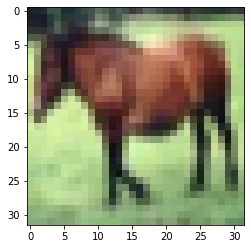

[7]


In [95]:
plt.figure()
plt.imshow(trainX[7])
plt.grid(False)
plt.show()

print(trainY[7])

In [104]:
trainX = x_train.astype('float32')
testX = x_test.astype('float32')
trainX /= 255
testX /= 255

(50000, 1)

In [105]:
model = Sequential()

In [106]:
model.add(keras.layers.Conv2D(32, (3,3), padding="same", input_shape=trainX.shape[1:], activation="relu"))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

'\nmodel.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))\nmodel.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))\nmodel.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="

In [107]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(len(classes), activation="softmax"))

In [108]:
optimizer=RMSprop(learning_rate=0.0001, decay=1e-6)

In [109]:
model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 6, 6, 64)        

In [111]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [112]:
early_stop= EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [113]:
# Convert class vectors to binary class matrices.
trainY = keras.utils.to_categorical(trainY, len(classes))
testY = keras.utils.to_categorical(testY, len(classes))

Fix up our data so that it is in float format

In [114]:
hist=model.fit(trainX[0:20000], trainY[0:20000], batch_size=40, epochs=40, validation_data=(testX[0:2000], testY[0:2000]), shuffle=True)

Train on 20000 samples, validate on 2000 samples
Epoch 1/40
20000/20000 [==============================] - 5s 256us/step - loss: 4.1781 - accuracy: 0.1849 - val_loss: 1.8297 - val_accuracy: 0.3540
Epoch 2/40
20000/20000 [==============================] - 4s 211us/step - loss: 1.8492 - accuracy: 0.3308 - val_loss: 1.6272 - val_accuracy: 0.4030
Epoch 3/40
20000/20000 [==============================] - 4s 215us/step - loss: 1.6677 - accuracy: 0.3897 - val_loss: 1.4862 - val_accuracy: 0.4640
Epoch 4/40
20000/20000 [==============================] - 4s 216us/step - loss: 1.5593 - accuracy: 0.4348 - val_loss: 1.4363 - val_accuracy: 0.4930
Epoch 5/40
20000/20000 [==============================] - 4s 212us/step - loss: 1.4683 - accuracy: 0.4724 - val_loss: 1.3583 - val_accuracy: 0.5230
Epoch 6/40
20000/20000 [==============================] - 4s 214us/step - loss: 1.4020 - accuracy: 0.4976 - val_loss: 1.3281 - val_accuracy: 0.5330
Epoch 7/40
20000/20000 [==============================] - 4s 21

In [115]:
def show_train_history(train_history, train, validation, title):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title)
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

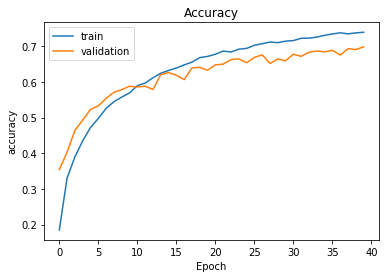

In [116]:
show_train_history(hist, 'accuracy', 'val_accuracy', 'Accuracy')

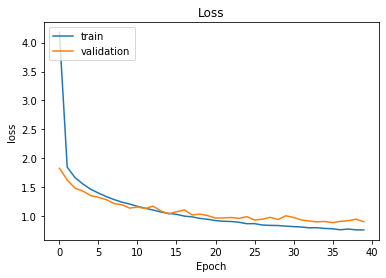

In [117]:
show_train_history(hist, 'loss', 'val_loss', 'Loss')